<a href="https://colab.research.google.com/github/nguyenanhtienabcd/AIO2024_EXERCISE/blob/feature%2FMODULE5-WEEK2/m05w02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EX1

## Take data and unzip data

In [ ]:
!gdown 1kU64ckjel-CpAH352bwU5hWMFT_caZxZ
!unzip /content/card_fraud_detection.zip -d /content/

Downloading...
From (original): https://drive.google.com/uc?id=1kU64ckjel-CpAH352bwU5hWMFT_caZxZ
From (redirected): https://drive.google.com/uc?id=1kU64ckjel-CpAH352bwU5hWMFT_caZxZ&confirm=t&uuid=23b8ee2a-617f-424b-9ee8-4d6aa6474ff3
To: /content/card_fraud_detection.zip
100% 69.2M/69.2M [00:01<00:00, 43.9MB/s]
Archive:  /content/card_fraud_detection.zip
  inflating: /content/creditcard.csv  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read data from CSV file
df = pd.read_csv('/content/creditcard.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# insert data 1 to the system
x = df.iloc[:, :-1].to_numpy().astype(np.float64)
y = df.iloc[:,-1].to_numpy().astype(np.uint8)
y_unique = df.iloc[:,-1].unique()
x_b = np.insert(x, 0, 1, axis=1)

In [ ]:
# one hot encoding class
# # create a zero matrix with (n)
y_one_hot = np.zeros((y.shape[0], len(y_unique))).astype(np.uint8)

In [ ]:
y_one_hot[np.arange(y.shape[0]), y] = 1
y_one_hot

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

## Training data

In [ ]:
def predict(x, w):
  z = np.dot(x, w)
  y_hat = np.exp(z) / np.sum(np.exp(z), axis = 1).reshape(-1,1)
  return y_hat

def compute_loss(y, y_hat):
  m = y.shape[0]
  loss = (-1/m) * np.sum(y * np.log(y_hat))
  return loss

def compute_gradient(x, y, y_hat):
  m = y.shape[0]
  gradient = (1/m)* np.dot(x.T, (y_hat - y))
  return gradient

def update_theta(w, gradient, learning_rate):
  w = w - learning_rate * gradient
  return w

In [ ]:
def output_predict(y_hat):
  y_pred = np.argmax(y_hat, axis=1)
  return y_pred

In [ ]:
def accuracy_score(y, y_pred):
  accuracy = np.sum(y == y_pred) / len(y)
  return accuracy

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
val_size = 0.2
test_size = 0.125
is_shuffle = True
x_train, x_val, y_train, y_val = train_test_split(x_b, y_one_hot, test_size=val_size, shuffle=is_shuffle)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=test_size, shuffle=is_shuffle)

scaler = StandardScaler()
x_train[:,1:] = scaler.fit_transform(x_train[:,1:])
x_val[:,1:] = scaler.transform(x_val[:,1:])
x_test[:,1:] = scaler.transform(x_test[:,1:])

In [ ]:
from math import e
# training data
lr = 0.01
epochs = 30
batch_size = 1024
n_features = x_train.shape[1]
k_classes = y_train.shape[1]
np.random.seed(42)
theta = np.random.randn(n_features, k_classes)
train_losses = []
val_size_losses = []
train_accs = []
val_accs = []

for epoch in range(epochs):
  batch_train_losses = []
  batch_val_size_losses = []
  batch_train_accs = []
  batch_val_accs = []
  for i in range(0, x_train.shape[0], batch_size):
    x_batch = x_train[i:i+batch_size]
    y_batch = y_train[i:i+batch_size]
    y_hat = predict(x_batch, theta)
    loss = np.sum(compute_loss(y_batch, y_hat))/len(x_batch)
    gradient = compute_gradient(x_batch, y_batch, y_hat)

    batch_train_losses.append(loss)
    batch_train_accs.append(accuracy_score(np.argmax(y_batch, axis=1), output_predict(y_hat)))

    theta = update_theta(theta, gradient, lr)

    y_val_hat = predict(x_val, theta)
    val_loss = np.sum(compute_loss(y_val, y_val_hat))/len(x_val)
    batch_val_size_losses.append(val_loss)
    batch_val_accs.append(accuracy_score(np.argmax(y_val, axis=1), output_predict(y_val_hat)))

  train_losses.append(sum(batch_train_losses)/len(batch_train_losses))
  val_size_losses = (sum(batch_val_size_losses)/len(batch_val_size_losses))
  train_accs.append(sum(batch_train_accs)/len(batch_train_accs))
  val_accs.append(sum(batch_val_accs)/len(batch_val_accs))



In [ ]:
theta

array([[ 3.06204886e+00, -2.70359901e+00],
       [ 8.96287529e-01,  1.27443087e+00],
       [-5.09331518e-01,  4.10411863e-02],
       [ 1.37687237e+00,  9.69775171e-01],
       [-1.87175223e-01,  2.60260880e-01],
       [-5.83589911e-01, -3.45557535e-01],
       [-3.45298025e-01, -1.32601995e+00],
       [-1.38666071e+00, -9.00544648e-01],
       [-5.00361799e-01, -1.98221989e-01],
       [-1.12546858e+00, -1.19485920e+00],
       [ 9.37608936e-01,  3.02263532e-01],
       [-2.41431938e-01, -1.11578804e+00],
       [-2.70703350e-01, -1.62756785e-01],
       [-3.31054643e-01, -4.44240916e-01],
       [-4.65261805e-01, -4.27070635e-01],
       [ 3.54110174e-01,  8.96461398e-01],
       [-4.79198742e-01, -5.92009412e-01],
       [ 2.79879575e-02, -4.26286695e-01],
       [-5.18418381e-01, -1.23238815e+00],
       [-4.96182775e-01, -6.35142038e-01],
       [ 4.60066554e-01,  4.49768307e-01],
       [-3.01434594e-01, -1.15317384e-01],
       [-1.25993147e+00, -9.38434731e-01],
       [ 2.

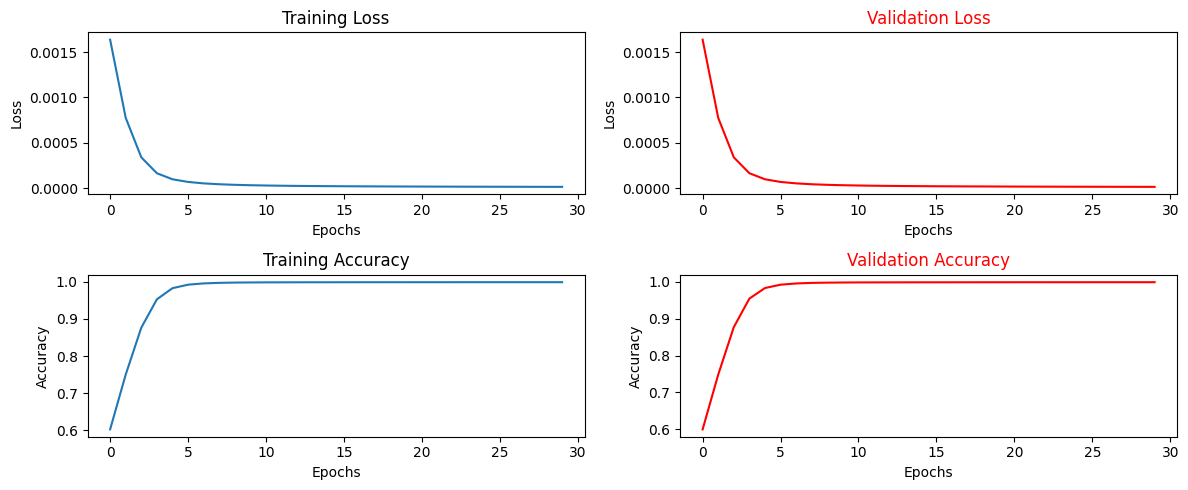

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(12,5))

ax[0,0].plot(train_losses, label='train_losses')
ax[0,0].set_title('Training Loss')
ax[0,0].set_xlabel('Epochs')
ax[0,0].set_ylabel('Loss')


ax[0,1].plot(train_losses, label='validation_losses', color = 'red')
ax[0,1].set_title('Validation Loss', color = 'red')
ax[0,1].set_xlabel('Epochs')
ax[0,1].set_ylabel('Loss')


ax[1,0].plot(train_accs, label='train_accs')
ax[1,0].set_title('Training Accuracy')
ax[1,0].set_xlabel('Epochs')
ax[1,0].set_ylabel('Accuracy')

ax[1,1].plot(val_accs, label='validation_accs', color = 'red')
ax[1,1].set_title('Validation Accuracy', color = 'red')
ax[1,1].set_xlabel('Epochs')
ax[1,1].set_ylabel('Accuracy')

# Điều chỉnh khoảng cách giữa các ô
plt.tight_layout()

plt.show()

In [ ]:
# let test with data test
y_test_pred = output_predict(predict(x_test, theta))
y_test_original = np.argmax(y_test, axis=1)
accuracy_score(y_test_original, y_test_pred)
a = (y_test_pred == 1).sum()
b = (y_test_original == 1).sum()
print(a,b)
print(len(y_test_pred))

38 49
28481


## Test

In [ ]:
a = np.array([0,1,0,0,1,0])
a_unique = np.unique(a)
a_one_hot = np.zeros((a.shape[0], len(a_unique))).astype(np.uint8)
a_one_hot[np.arange(a.shape[0]), a] = 1
a_one_hot

array([[1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0]], dtype=uint8)

In [ ]:
np.random.seed(42)
a = np.array(np.random.randint(10, size=10)).reshape(-1,2)



# EX2

## Take data and unzip data

In [ ]:
!gdown 1e1uIwcJ1-MviSn9yk_ldPGffDWVp6yK_
!unzip /content/twitter_sentiment_analysis_3cls_dataset.zip -d /content/

Downloading...
From: https://drive.google.com/uc?id=1e1uIwcJ1-MviSn9yk_ldPGffDWVp6yK_
To: /content/twitter_sentiment_analysis_3cls_dataset.zip
100% 7.97M/7.97M [00:00<00:00, 47.2MB/s]
Archive:  /content/twitter_sentiment_analysis_3cls_dataset.zip
  inflating: /content/Twitter_Data.csv  


In [ ]:
# read data from csv file
import pandas as pd
df2 = pd.read_csv('/content/Twitter_Data.csv')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [ ]:
df2.dropna(inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162969 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162969 non-null  object 
 1   category    162969 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.7+ MB


## Preprocessing data

In [ ]:
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('snowball_data')
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def preprocess_text(text):

    text = re.sub(r'^RT[\s]+','',text)
    #Hyperlink removal
    text = re.sub(r'hppt?: \/\/.*[\r\n]*', '', text)

    # puntuation removal
    text = re.sub(r'[^\w\s]', '', text)

    stop_words = set(stopwords.words('english'))

    text = text.split(' ')
    text_token = [word for word in text if word not in stop_words]

    # using sterming technique
    stemmer = SnowballStemmer("english")
    text = ' '.join([stemmer.stem(word) for word in text_token])

    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package snowball_data to /root/nltk_data...
[nltk_data]   Package snowball_data is already up-to-date!


## Training Data

In [ ]:
preprocessed_df2 = pd.DataFrame(columns=['clean_text', 'category'])
preprocessed_df2['clean_text'] = df2['clean_text'].apply(preprocess_text)
preprocessed_df2['category'] = df2['category']

In [ ]:
preprocessed_df2

,clean_text,category
0,modi promis minimum govern maximum govern expe...,-1.0
1,talk nonsens continu drama vote modi,0.0
2,say vote modi welcom bjp told rahul main camp...,1.0
3,ask support prefix chowkidar name modi great s...,1.0
4,answer among power world leader today trump pu...,1.0
...,...,...
162975,456 crore paid neerav modi recov congress lead...,-1.0
162976,dear rss terrorist payal gawar modi kill 1000 ...,-1.0
162977,cover interact forum left,0.0
162978,big project came india modi dream project happ...,0.0


In [ ]:
# vectorization text data
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=2000)
x = vectorizer.fit_transform(preprocessed_df2['clean_text']).toarray()
x = np.insert(x, 0, 1, axis=1)
y = preprocessed_df2['category'].to_numpy().astype(np.uint8) + 1
y_unique = np.unique(y)

# one hot encoding class
# # create a zero matrix with (n)
y_one_hot = np.zeros((y.shape[0], len(y_unique))).astype(np.uint8)
y_one_hot[np.arange(y.shape[0]), y] = 1

In [ ]:
print(y_one_hot.shape)
print(y_one_hot)

(162969, 3)
[[1 0 0]
 [0 1 0]
 [0 0 1]
 ...
 [0 1 0]
 [0 1 0]
 [0 0 1]]


In [ ]:
print(x.shape)
print(y.shape)
print(x)
sum_x = x.sum(axis=1)
print(sum_x)
print(sum_x.shape)

(162969, 2001)
(162969,)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
[4.90835277 3.26578739 4.06967286 ... 2.72636939 3.50282382 4.47689839]
(162969,)


In [ ]:
def predict(x, w):
  z = np.dot(x, w)
  y_hat = np.exp(z) / np.sum(np.exp(z), axis = 1).reshape(-1,1)
  return y_hat

def compute_loss(y, y_hat):
  m = y.shape[0]
  loss = (-1/m) * np.sum(y * np.log(y_hat))
  return loss

def compute_gradient(x, y, y_hat):
  m = y.shape[0]
  gradient = (1/m)* np.dot(x.T, (y_hat - y))
  return gradient

def update_theta(w, gradient, learning_rate):
  w = w - learning_rate * gradient
  return w

In [ ]:
def output_predict(y_hat):
  y_pred = np.argmax(y_hat, axis=1)
  return y_pred

def accuracy_score(y, y_pred):
  accuracy = np.sum(y == y_pred) / len(y)
  return accuracy

In [ ]:
val_size = 0.2
test_size = 0.125
is_shuffle = True
x_train, x_val, y_train, y_val = train_test_split(x, y_one_hot, test_size=val_size, shuffle=is_shuffle)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=test_size, shuffle=is_shuffle)


In [ ]:
lr = 0.01
epochs = 200
batch_size = x_train.shape[0]
n_features = x_train.shape[1]
k_classes = y_train.shape[1]
np.random.seed(42)
theta = np.random.randn(n_features, k_classes)
train_losses = []
val_losses = []
train_accs = []
val_accs = []
for epoch in range(epochs):
  batch_train_losses = []
  batch_val_size_losses = []
  batch_train_accs = []
  batch_val_accs = []
  for i in range(0, x_train.shape[0], batch_size):
    x_batch = x_train[i:i+batch_size]
    y_batch = y_train[i:i+batch_size]
    y_hat = predict(x_batch, theta)
    loss = np.sum(compute_loss(y_batch, y_hat))/len(x_batch)
    gradient = compute_gradient(x_batch, y_batch, y_hat)

    batch_train_losses.append(loss)
    batch_train_accs.append(accuracy_score(np.argmax(y_batch, axis=1), output_predict(y_hat)))

    theta = update_theta(theta, gradient, lr)

    y_val_hat = predict(x_val, theta)
    val_loss = np.sum(compute_loss(y_val, y_val_hat))/len(x_val)
    batch_val_size_losses.append(val_loss)
    batch_val_accs.append(accuracy_score(np.argmax(y_val, axis=1), output_predict(y_val_hat)))

  train_losses.append(sum(batch_train_losses)/len(batch_train_losses))
  val_losses.append(sum(batch_val_size_losses)/len(batch_val_size_losses))
  train_accs.append(sum(batch_train_accs)/len(batch_train_accs))
  val_accs.append(sum(batch_val_accs)/len(batch_val_accs))


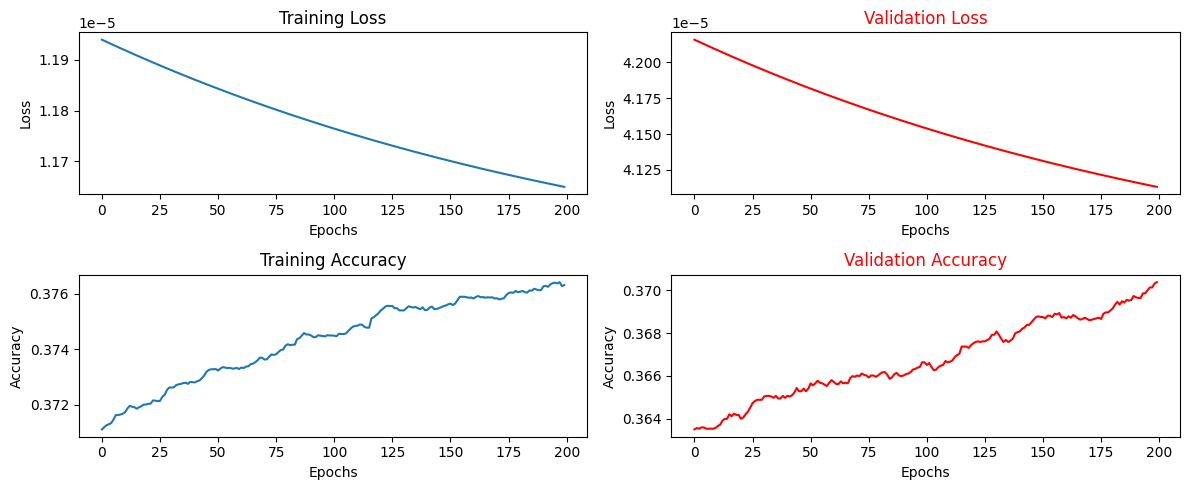

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2, figsize=(12,5))

ax[0,0].plot(train_losses, label='train_losses')
ax[0,0].set_title('Training Loss')
ax[0,0].set_xlabel('Epochs')
ax[0,0].set_ylabel('Loss')


ax[0,1].plot(val_losses, label='validation_losses', color = 'red')
ax[0,1].set_title('Validation Loss', color = 'red')
ax[0,1].set_xlabel('Epochs')
ax[0,1].set_ylabel('Loss')


ax[1,0].plot(train_accs, label='train_accs')
ax[1,0].set_title('Training Accuracy')
ax[1,0].set_xlabel('Epochs')
ax[1,0].set_ylabel('Accuracy')

ax[1,1].plot(val_accs, label='validation_accs', color = 'red')
ax[1,1].set_title('Validation Accuracy', color = 'red')
ax[1,1].set_xlabel('Epochs')
ax[1,1].set_ylabel('Accuracy')

# Điều chỉnh khoảng cách giữa các ô
plt.tight_layout()

plt.show()